# Analyse der Bundesliga-Spieler

# Gliederung

1. Titel & Einfuehrung
2. Daten laden & Ueberblick
3. Grundlegende Statistiken
4. Positions- & Altersanalyse
5. Marktwert-Analyse
6. Vertrags-Analyse
7. Plot & Visualisierung
8. Fazit/ Insights

# Einfuehrung

Der Datensatz umfasst 515 Profifußballer aus der Bundesliga mit insgesamt 17 Merkmalen pro Spieler.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_frame = pd.read_csv("../data/bundesliga_player.csv")
data_frame.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


# Anzahl der Spalten

In [3]:
data_frame.count(axis=1)


0      17
1      16
2      16
3      14
4      16
       ..
510    17
511    15
512    17
513    17
514    15
Length: 515, dtype: int64

Das DataFrame beinhaltet 17 Spalten.


Die Spalten lauten
- name
- full_Name
- age
- height
- nationality
- place_of_birth
- price
- max_price
- position
- shirt_nr
- foot
- club
- contract_expires
- joined_club
- player_agent
- outfitter

# Anzahl der Spieler

In [4]:
data_frame["name"].count()

np.int64(515)

Die Anzahl der eingetragenen Spieler betraegt 515.

# Grundlegende Statisktik

# Durchschnitts Alter / Groesse

In [5]:
durchschnitts_alter = data_frame["age"].mean()
durchschnitts_groesse = data_frame["height"].mean()

print(f"Ø Alter: {durchschnitts_alter:.0f}")
print(f"Ø Groesse: {durchschnitts_groesse:.2f}cm")

Ø Alter: 26
Ø Groesse: 1.85cm


# Vergleich rechter / linker Fuss

In [6]:
fuss = data_frame["foot"].value_counts()
fuss

foot
right    354
left     118
both      34
Name: count, dtype: int64

# Mindest / Maximal Alter

In [7]:
mindest_alter = data_frame["age"].min()
maximal_alter = data_frame["age"].max()

print(f"Mindest Alter: {mindest_alter}")
print(f"Maximal Alter: {maximal_alter}")


Mindest Alter: 17
Maximal Alter: 39


# Haeufigste Nationalitaet

In [8]:
haeufigste_nat = data_frame["nationality"].value_counts(ascending=False)
haeufigste_nat.head(10)


nationality
Germany             178
Austria              21
Denmark              12
Croatia              11
Japan                10
Netherlands           9
Germany  Nigeria      7
Portugal              7
Switzerland           7
Germany  Turkey       7
Name: count, dtype: int64

Die Haeufigste Nationalitäten ist Germany mit 178 Spielern.

# Visualisierung Top 10 Nationalitäten

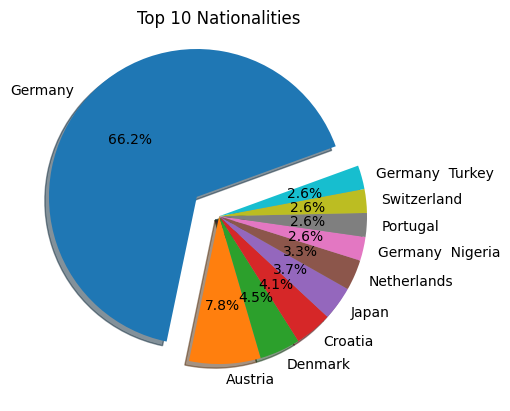

In [9]:
values = data_frame["nationality"].value_counts().sort_values(ascending=False)
labels = data_frame["nationality"].value_counts().head(10).index

plt.pie(values.head(10).values, labels=labels, autopct="%1.1f%%", startangle=20, shadow=True, explode=[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0])

plt.title("Top 10 Nationalities")

plt.show()

# Positions- & Altersanalyse

# Spieler pro Position


In [10]:
spieler_pro_position = data_frame["position"].value_counts()
spieler_pro_position

position
Defender - Centre-Back           88
Attack - Centre-Forward          73
Goalkeeper                       69
midfield - Central Midfield      56
Defender - Right-Back            44
midfield - Defensive Midfield    40
Defender - Left-Back             40
midfield - Attacking Midfield    40
Attack - Right Winger            30
Attack - Left Winger             22
Attack - Second Striker           7
midfield - Right Midfield         4
midfield - Left Midfield          2
Name: count, dtype: int64

# Dominierende Positionen

In [11]:
top_3_positionen = data_frame.groupby("position")["position"].value_counts().sort_values(ascending=False)

print("Top 3 der dominierenden Positionen sind:")
print(f"1. {top_3_positionen.index[0]} - Spieler: {top_3_positionen.values[0]}")
print(f"2. {top_3_positionen.index[1]} - Spieler: {top_3_positionen.values[1]}")
print(f"3. {top_3_positionen.index[2]} - Spieler: {top_3_positionen.values[2]}")


Top 3 der dominierenden Positionen sind:
1. Defender - Centre-Back - Spieler: 88
2. Attack - Centre-Forward - Spieler: 73
3. Goalkeeper - Spieler: 69


# Position - Preis verhaeltniss

In [12]:
durchschnitt_position_price = data_frame.groupby("position")["price"].mean().sort_values(ascending=False).round(2)
durchschnitt_position_price

position
Attack - Second Striker          17.93
midfield - Attacking Midfield    13.41
Attack - Left Winger             12.22
Attack - Right Winger            10.86
Defender - Centre-Back           10.32
midfield - Central Midfield      10.08
Defender - Right-Back             7.90
Attack - Centre-Forward           7.68
midfield - Defensive Midfield     7.00
Defender - Left-Back              6.98
midfield - Right Midfield         4.53
midfield - Left Midfield          3.40
Goalkeeper                        2.12
Name: price, dtype: float64

# Visualisierung: Durchschnittspreis fuer die Positionen

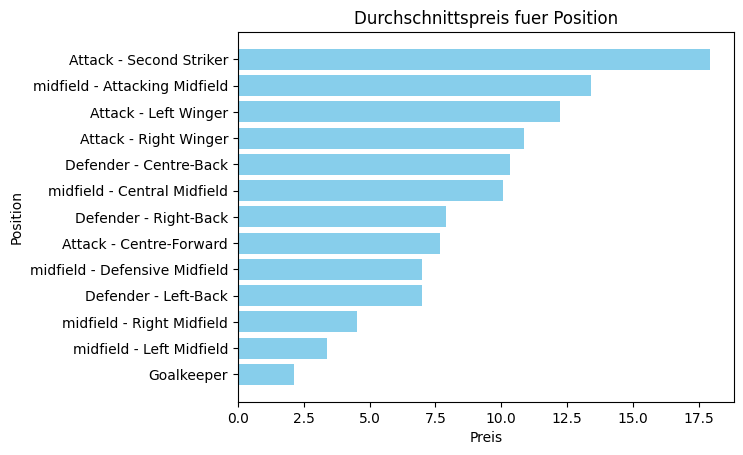

In [13]:
durchschnitt = data_frame.groupby("position")["price"].mean().sort_values(ascending=True)

plt.barh(durchschnitt.index, durchschnitt.values, color="skyblue")

plt.title("Durchschnittspreis fuer Position")

plt.xlabel("Preis")
plt.ylabel("Position")

plt.show()


# Altersanalyse

# Durchschnittsalter

In [14]:
avg_alter = data_frame["age"].value_counts().mean().round()
avg_alter

np.float64(22.0)

Das Durchschnittsalter beträgt 22

# Durchschnittsalter pro Position

In [15]:
avg_alter_position = data_frame.groupby("position")["age"].mean().round()
avg_alter_position

position
Attack - Centre-Forward          26.0
Attack - Left Winger             25.0
Attack - Right Winger            25.0
Attack - Second Striker          27.0
Defender - Centre-Back           25.0
Defender - Left-Back             26.0
Defender - Right-Back            26.0
Goalkeeper                       27.0
midfield - Attacking Midfield    24.0
midfield - Central Midfield      25.0
midfield - Defensive Midfield    26.0
midfield - Left Midfield         24.0
midfield - Right Midfield        25.0
Name: age, dtype: float64

# Visualisierung: Durchschnittsalter pro Position

<BarContainer object of 13 artists>

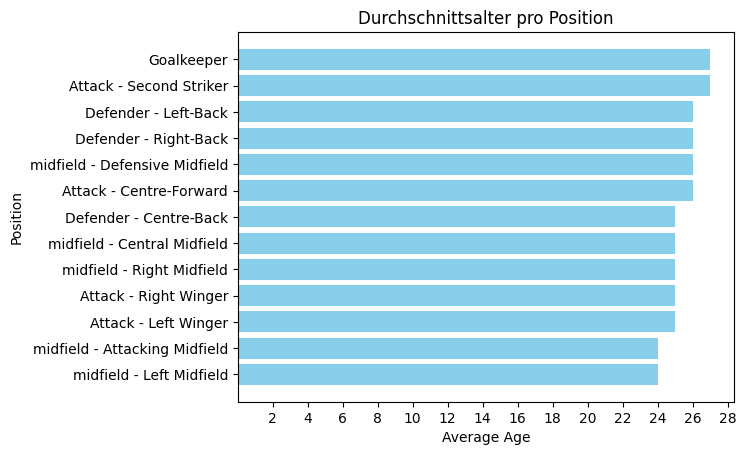

In [16]:
index = data_frame.groupby("position")["age"].mean().round().sort_values(ascending=True)


plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])

plt.title("Durchschnittsalter pro Position")
plt.xlabel("Average Age")
plt.ylabel("Position")


plt.barh(index.index, index.values, color="skyblue")

# Jüngste & Älteste Spieler

In [17]:
youngest = data_frame[data_frame["age"] == data_frame["age"].min()]
youngest.loc[:, ["name", "age"]]

,name,age
18,Paul Wanner,17
19,Arijon Ibrahimovic,17
56,Julien Duranville,17
64,Timo Schlieck,17
245,Tom Bischof,17
301,Mert Kömür,17
348,Philipp Schulz,17
429,Ibrahim Maza,17
439,Fabio Chiarodia,17


In [18]:
oldest = data_frame[data_frame["age"] == data_frame["age"].max()]
oldest.loc[:, ["name", "age"]]

,name,age
122,Makoto Hasebe,39


# Marktwert junger Spieler vergleich zu Erfahrene Spieler

In [19]:
data_frame["age_group"] = pd.cut(
    data_frame["age"],
    bins=[0, 23, 30, 100],
    labels=["young", "prime", "old"]
)
data_frame.groupby("age_group", observed=True)["price"].median() # ignoriere nicht benutzte Kategorien

age_group
young    2.0
prime    5.5
old      1.6
Name: price, dtype: float64

Junge Spieler unter 23 Jahren verdienen im Durchschnitt weniger als Ältere Spieler über 23+ Jahren

# Positionen Altersklassen

In [20]:
position_young = data_frame.groupby("age_group", observed=True)["position"].value_counts().sort_values(ascending=False)
position_young["young"]

position
Defender - Centre-Back           32
Goalkeeper                       22
Attack - Centre-Forward          22
midfield - Attacking Midfield    21
midfield - Central Midfield      21
midfield - Defensive Midfield    13
Defender - Right-Back            12
Defender - Left-Back             11
Attack - Right Winger            11
Attack - Left Winger              9
Attack - Second Striker           2
midfield - Right Midfield         2
midfield - Left Midfield          1
Name: count, dtype: int64

Die Führenden Positionen der Altersklasse "young" sind wie zu sehen Defender - Centre-Back, Goalkeeper, Attack - Centre-Forward

# Marktwert-Analyse

# Teuersten Spieler


In [21]:
expensive_players = data_frame.loc[:, ["name", "price"]].sort_values(by="price", ascending=False)
expensive_players.head(10)

,name,price
47,Jude Bellingham,120.0
17,Jamal Musiala,110.0
106,Florian Wirtz,85.0
83,Christopher Nkunku,80.0
14,Joshua Kimmich,80.0
4,Matthijs de Ligt,75.0
66,Josko Gvardiol,75.0
22,Leroy Sané,70.0
7,Alphonso Davies,70.0
15,Leon Goretzka,65.0


In dieser Tabelle sind die Top 10 teuersten Spieler zu sehen.

# Spieler mit Potenzial

In [22]:
price = data_frame.loc[:, ["price", "name"]].sort_values(by="price", ascending=False)
price.head(10)

,price,name
47,120.0,Jude Bellingham
17,110.0,Jamal Musiala
106,85.0,Florian Wirtz
83,80.0,Christopher Nkunku
14,80.0,Joshua Kimmich
4,75.0,Matthijs de Ligt
66,75.0,Josko Gvardiol
22,70.0,Leroy Sané
7,70.0,Alphonso Davies
15,65.0,Leon Goretzka


# Spieler mit möglichen Wert Anstieg

In [23]:
data_frame["diff"] = (data_frame["max_price"] - data_frame["price"] ).abs()
top_five_diff = data_frame.loc[:, ["name", "price", "max_price", "diff"]].sort_values(by="diff", ascending=False)
top_five_diff.head(5)


,name,price,max_price,diff
21,Sadio Mané,45.0,150.0,105.0
24,Thomas Müller,18.0,75.0,57.0
84,Timo Werner,25.0,80.0,55.0
33,Mats Hummels,6.5,60.0,53.5
136,Mario Götze,13.0,55.0,42.0


# Ausreisser


In [24]:
data_frame_clean = data_frame.dropna(subset=["price"])

def find_outliers_iqr(group):
    Q1 = group["price"].quantile(0.25) # 25% liegen unterhalb des Quantiles und 75% oberhalb des Quantiles Q1
    # Q1 ist DIE ZAHL bei 25% unterhalb dessen die @25% der Daten liegen
    # Q1 ist eine einzelne Zahl
    # besipiel: [1, 2, 3, 4, 5] hier ist Q1(25%) die Zahl 2, Q2(Median=50%) die Zahl 3 und Q3(75%) = 4
    # Q1, Q2, Q3 sind Grenzwerte, die die Daten in vier Teile teilen. Sie sind Zahlen, keine Mengen von Zahlen.
    Q3 = group["price"].quantile(0.75) # 75% liegen unterhalb des Quantiles und 25% liegen oberhaln des Quantiles Q2

    # Man benutzt in Python .quantile(0.25 o. 0.75) um Quartil 1 o Quratil 2 zu finden

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 5 * IQR


    # Hier wird berechnet ob Ausreiser oder nicht
    group["outlier"] = (
        (group["price"] < lower) |
        (group["price"] > upper)
    )
    return group

# group ist in dem Code, teilt data_frame in Gruppen nach Position auf z.b:
# Gruppe 1: alle Goalkeeper, Gruppe 2: alle Attack-Midfield usw...

# .quantile() gibt den Wert an einem bestimmten Quantil zurueck:
# 0.25, 0.5, 0.75


# Anhand des IQRs welches man mit Q1 und Q3 berechnet, wird eine untere, obere Grenze berechnet und dann prueft man ob ein Spieler einer Position ueber der Grenze oder unter der Grenze liegt

outliers = (
    data_frame_clean
    .groupby("position", group_keys=False)
    .apply(find_outliers_iqr)
)

only_outliers = outliers[outliers["outlier"]]
only_outliers[["name", "position", "price"]].sort_values(
    by="price", ascending=False
)



C:\Users\barto\AppData\Local\Temp\ipykernel_13256\729822881.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(find_outliers_iqr)


,name,position,price
47,Jude Bellingham,midfield - Central Midfield,120.0
17,Jamal Musiala,midfield - Attacking Midfield,110.0
106,Florian Wirtz,midfield - Attacking Midfield,85.0
14,Joshua Kimmich,midfield - Defensive Midfield,80.0
4,Matthijs de Ligt,Defender - Centre-Back,75.0
66,Josko Gvardiol,Defender - Centre-Back,75.0
22,Leroy Sané,Attack - Right Winger,70.0
7,Alphonso Davies,Defender - Left-Back,70.0
140,Randal Kolo Muani,Attack - Centre-Forward,65.0
15,Leon Goretzka,midfield - Central Midfield,65.0


Hier sieht man die Ausreißer der jeweiligen Positionen

# Boxplot Ausreißer

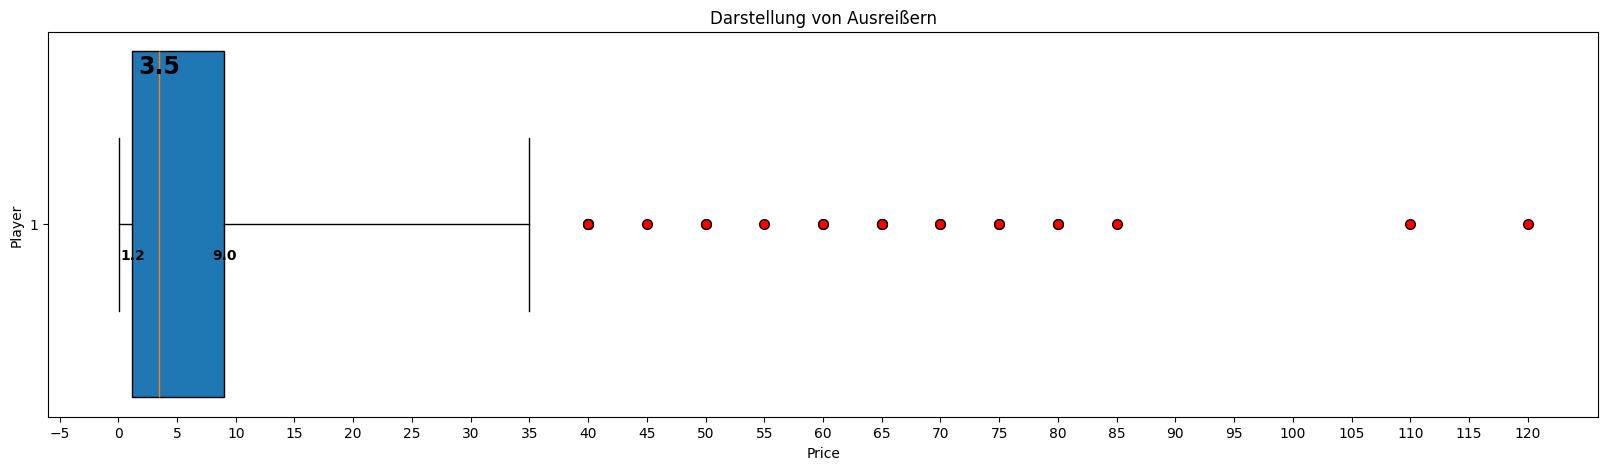

In [25]:
plt.figure(figsize=(20,5))  # Breiter statt hoch

box = plt.boxplot([data_frame_clean["price"]], vert=False, flierprops=dict(marker="o", markersize=7, markerfacecolor="red"),patch_artist=True,widths=.9,whis=3.5 )

median_line = box["medians"][0]
median_value = median_line.get_xdata().mean()

plt.text(
    median_value,       # X-Position
    1.38,               # Y-Position leicht oberhalb der Box (bei horizontalem Plot)
    f"{median_value}", # Text (z.B. 80)
    ha='center',        # horizontal zentriert
    va='bottom',
    fontsize=17,
    color='black',
    fontweight='bold'
)


Q1 = np.percentile(outliers["price"], 25)
Q3 = np.percentile(outliers["price"], 75)



plt.text(Q1, 0.9, f"{Q1}", ha='center', va='bottom', color='black', fontweight='bold')
plt.text(Q3, 0.9, f"{Q3}", ha='center', va='bottom', color='black', fontweight='bold')

plt.ylabel("Player")
plt.xlabel("Price")
plt.xticks([-5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50 ,55 ,60 ,65 ,70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120])

plt.title("Darstellung von Ausreißern")

# plt.xlabel("price")

plt.show()

1. 50% der Spieler kosten mehr als $3.5m und 50% der Spieler kosten weniger als $3.5mio.
2. 50% der Spieler kosten innerhalb von $1.2mio und $9mio.
3. 25% der Spieler kosten weniger als $1.2mio und 75% der Spieler kosten mehr als $1.2mio.
4. 75% der Spieler kosten weniger als $9mio und 25% der Spieler kosten mehr als $9mio.
5. Spieler die Auserhalb des Intervals [-10,5;35] sind, werden als Ausreißer markiert.

In [ ]:
# NOTES

# # Min = 0
# # Max = 35

# Q1 = outliers["price"].quantile(0.25)
# Q3 = outliers["price"].quantile(0.75)
# median = outliers["price"].median()
# # Q1 = 1.2
# # Q2 = 9.0
# # median = 3.5

# IQR = Q3 - Q1
# # IQR = 7.8

# lower = Q1 - 1.5 * IQR
# upper = Q3 + 3.5 * IQR

# print(lower)
# print(upper)


# IQR Goalkeeper

In [27]:

goalkeeper = data_frame.loc[
    (data_frame["position"] == "Goalkeeper") & (data_frame["price"].notna()),
    ["name", "price"]
].copy()



def berechne_IQR(dataframe):
    Q1 = dataframe["price"].quantile(0.25)
    Q3 = dataframe["price"].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 5 * IQR

    dataframe["outlier"] = (
        (dataframe["price"] < lower) |
        (dataframe["price"] > upper)
    )
        
    return dataframe


outliers_goalkeeper = berechne_IQR(goalkeeper)

only_outliers_goalkeeper = outliers_goalkeeper[outliers_goalkeeper["outlier"]]
only_outliers_goalkeeper.sort_values(by="price", ascending=False)


# pd.set_option("display.max_rows", None)  # zeigt alle Zeilen
# pd.set_option("display.max_columns", None)  # zeigt alle Spalten



,name,price,outlier
27,Gregor Kobel,35.0,True


# Marktwert-Analyse

# Teuerste Spieler

In [49]:
expensive_player = data_frame.loc[data_frame["price"].idxmax(), ["name", "position", "age", "price", "max_price"]]
expensive_player


name                     Jude Bellingham
position     midfield - Central Midfield
age                                   19
price                              120.0
max_price                          120.0
Name: 47, dtype: object